# Guided Project #15 - Predicting Car Prices
By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) and [Dataquest](http://www.dataquest.io)

In this guided project, I'll practice the machine learning workflow to predict a car's market price using its attributers.

The dataset is from the Machine Learning Repository of Center for Machine Learning and Intelligent Systems in University of California, Irvine. It's an abstract from 1985 Ward's Automotive Yearbook .

I'll be using the K-Nearest Neighbors algorithm.

The data is publicly available in this [repository](https://archive.ics.uci.edu/ml/datasets/automobile).

## 1.- Library and Jupyter setup.
Import `pandas` and do exploratory data analysis.

In [1]:
import pandas as pd

cars = pd.read_csv("imports-85.data")

In [2]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It seems that `imports-85.data` does not include the columns needed. I will have to manually declare them.

In [3]:
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type',
           'aspiration', 'num_doors', 'body_style', 'drive_wheels',
           'engine_location', 'wheel_base', 'length', 'width', 'height',
           'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
           'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
           'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [4]:
cars = pd.read_csv("imports-85.data", names = columns)

In [5]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

It seems I will have to cast some columns to `float64` types, as they appear as `object`. The target column is `price`. Also I will only use the columns where the values are `continuous`, as stated in the data dictionary.

In [7]:
continuous_columns = ['normalized_losses', 'wheel_base', 'length', 'width',
                     'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
                     'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
                     'highway_mpg', 'price']
new_cars = cars[continuous_columns]

In [8]:
new_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## 2.- Data Cleaning.
Normalize columns, values, and drop rows with NAN.

In [9]:
# Replace "?" with NAN.
import numpy as np

new_cars = new_cars.replace("?", np.nan)

In [10]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


First I will drop the rows with no price, as that is the most important value needed.

In [11]:
new_cars = new_cars.dropna(subset = ['price'])

In [12]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_size          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    201 non-null float64
horsepower           199 non-null object
peak_rpm             199 non-null object
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 25.1+ KB


Now I will cast `float` to the entire dataframe.

In [13]:
new_cars = new_cars.astype(float)

In [14]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


As a penultimate step, I will fill the NAN with the column mean.

In [15]:
new_cars = new_cars.fillna(new_cars.mean())

In [16]:
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


The last step is to normalize the columns except `price`. Use `sklearn` and `preprocessing`.

In [17]:
from sklearn import preprocessing

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
new_cars_scaled = min_max_scaler.fit_transform(new_cars)

# Run the normalizer on the dataframe
normalized_cars = pd.DataFrame(new_cars_scaled, columns = continuous_columns)

# This is to preserve the price column.
price = new_cars['price']

normalized_cars['price'] = price

In [18]:
normalized_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [19]:
# Dataquest uses a single line of code:
normalized_cars = (new_cars - new_cars.min()) / (new_cars.max() - new_cars.min())
normalized_cars['price'] = price
normalized_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [20]:
normalized_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## 3.- Univariate Model.
Define a function to train and test univariate models.

In [21]:
normalized_cars.shape

(201, 15)

In [22]:
# Slice data into 75% and 25%.
201 * .75

150.75

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE

def knn_train_test(column, target, dataframe):
    # This is to enable repetition.
    np.random.seed(1)
    #Shuffle rows.
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    
    #Slice dataframe with 75% and 25%
    row_slice = int(len(dataframe) * .75)
    train = dataframe.loc[:row_slice].copy()
    test = dataframe.loc[row_slice:].copy()
    
    knn = KNR()
    
    knn.fit(train[[column]], train[target])
    predictions = knn.predict(test[[column]])
    
    return np.sqrt(MSE(test[target], predictions))

In [24]:
all_features = normalized_cars.columns.drop('price')

for i in all_features:
    rmse = knn_train_test(i, 'price', normalized_cars)
    print('For ' + str(i) + " the rmse is: " + str(rmse))

For normalized_losses the rmse is: 8048.324503273958
For wheel_base the rmse is: 4337.206637053393
For length the rmse is: 7042.327801586633
For width the rmse is: 5089.651038627305
For height the rmse is: 8637.56524997062
For curb_weight the rmse is: 3353.2603164681386
For engine_size the rmse is: 3036.5293967785005
For bore the rmse is: 9463.427863094852
For stroke the rmse is: 7616.9429776649895
For compression_ratio the rmse is: 7680.283072094413
For horsepower the rmse is: 5339.812340335567
For peak_rpm the rmse is: 8144.008032289752
For city_mpg the rmse is: 3584.4873451443514
For highway_mpg the rmse is: 5030.311723939183


Better to use a dictionary and convert it to a series.

In [25]:
rmse_results = {}

for i in all_features:
    rmse_results[i] = knn_train_test(i, 'price', normalized_cars)
    
rmse1 = pd.Series(rmse_results)
rmse1.sort_values()

engine_size          3036.529397
curb_weight          3353.260316
city_mpg             3584.487345
wheel_base           4337.206637
highway_mpg          5030.311724
width                5089.651039
horsepower           5339.812340
length               7042.327802
stroke               7616.942978
compression_ratio    7680.283072
normalized_losses    8048.324503
peak_rpm             8144.008032
height               8637.565250
bore                 9463.427863
dtype: float64

It seems that with the default `k` value engine_size is the best feature. Let's modify the function to accept `k`.

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE

def knn_train_test(column, target, dataframe, k):
    # This is to enable repetition.
    np.random.seed(1)
    #Shuffle rows.
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    
    #Slice dataframe with 75% and 25%
    row_slice = int(len(dataframe) * .75)
    train = dataframe.loc[:row_slice].copy()
    test = dataframe.loc[row_slice:].copy()
    
    rmse = {}
    
    for i in k:
        knn = KNR(n_neighbors = i)
        knn.fit(train[[column]], train[target])
        predictions = knn.predict(test[[column]])
        rmse[i] = np.sqrt(MSE(test[target], predictions))
        
    return rmse

In [27]:
k = [1,3,4,7,9]

rmse_results = {}

for i in all_features:
    rmse_results[i] = knn_train_test(i, 'price', normalized_cars, k)
    
rmse_results

{'bore': {1: 5537.0246297086305,
  3: 8280.55921311746,
  4: 9899.127898377588,
  7: 8796.103917940265,
  9: 8255.316441084391},
 'city_mpg': {1: 3591.543722760451,
  3: 3809.484711071681,
  4: 3611.627415701092,
  7: 3673.5412931738033,
  9: 3981.2090959582547},
 'compression_ratio': {1: 11403.388775381642,
  3: 9257.356311709324,
  4: 8195.362048467947,
  7: 7069.653976464391,
  9: 7196.594492812658},
 'curb_weight': {1: 3715.786247552461,
  3: 3998.5976204859066,
  4: 3808.4945762728876,
  7: 3777.237535452952,
  9: 4240.829961498773},
 'engine_size': {1: 2676.108520314526,
  3: 3017.1098327796344,
  4: 2981.85621588089,
  7: 3213.034664869501,
  9: 3259.406674591308},
 'height': {1: 9260.831283556568,
  3: 9365.281761125918,
  4: 8717.512804693779,
  7: 8002.9128525978285,
  9: 8463.556582288851},
 'highway_mpg': {1: 5143.5850763353765,
  3: 4306.257069015323,
  4: 4763.8928725131145,
  7: 4999.787933385428,
  9: 5519.791134682968},
 'horsepower': {1: 5167.038525596649,
  3: 5565.9

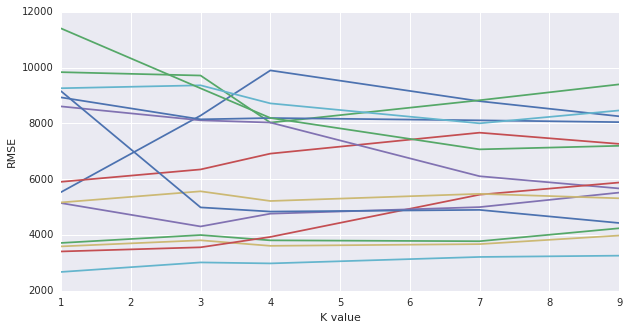

In [28]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(10,5))

for k, v in rmse_results.items():
    # As my schoolmates stated, using a dictionary would affect the order of the K and mess 
    # my plot. Better to use the order wanted and a list comprehension.
    x = [1,3,4,7,9]
    y = [v[i] for i in x]
    
    plt.plot(x,y)
    plt.xlabel('K value')
    plt.ylabel('RMSE')

## 4.- Multivariate Model.
Modify function to train and test multivariate models.

In [29]:
def knn_train_test(columns, target, dataframe, k):
    # This is to enable repetition.
    np.random.seed(1)
    #Shuffle rows.
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    
    #Slice dataframe with 75% and 25%
    row_slice = int(len(dataframe) * .75)
    train = dataframe.loc[:row_slice].copy()
    test = dataframe.loc[row_slice:].copy()
    
    # Machine Learning   
    knn = KNR(n_neighbors = k)
    knn.fit(train[columns], train[target])
    predictions = knn.predict(test[columns])
            
    return np.sqrt(MSE(test[target], predictions))

In [30]:
# New parameters to use.
k = 5
multiple_columns = list(rmse1.sort_values().index)
best_2 = multiple_columns[:2]
best_3 = multiple_columns[:3]
best_4 = multiple_columns[:4]
best_5 = multiple_columns[:5]
best_features = [best_2, best_3, best_4, best_5]

for features in best_features:
    rmse_best = knn_train_test(features, 'price', normalized_cars, k)
    print("For " + str(features) + " the result is: " + str(rmse_best))

For ['engine_size', 'curb_weight'] the result is: 3155.565405755361
For ['engine_size', 'curb_weight', 'city_mpg'] the result is: 3125.4768664157464
For ['engine_size', 'curb_weight', 'city_mpg', 'wheel_base'] the result is: 3953.50477298308
For ['engine_size', 'curb_weight', 'city_mpg', 'wheel_base', 'highway_mpg'] the result is: 3974.23062113914


Again, it's better to use a `Series object`.

In [31]:
mrmse_results = {}

for features in best_features:
    mrmse_results[str(features)] = knn_train_test(features, 'price', normalized_cars, k)
    
rmse2 = pd.Series(mrmse_results)
rmse2.sort_values()

['engine_size', 'curb_weight', 'city_mpg']                                 3125.476866
['engine_size', 'curb_weight']                                             3155.565406
['engine_size', 'curb_weight', 'city_mpg', 'wheel_base']                   3953.504773
['engine_size', 'curb_weight', 'city_mpg', 'wheel_base', 'highway_mpg']    3974.230621
dtype: float64

It would seem that the best features to use are: `engine_size`, `curb_weight`, `city_mpg` and `wheel_base`.

## 5.- Hyperparameter Tuning.
Modify function to tune k from 1 to 25.

In [32]:
def knn_train_test(columns, target, dataframe, k):
    # This is to enable repetition.
    np.random.seed(1)
    #Shuffle rows.
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    
    #Slice dataframe with 75% and 25%
    row_slice = int(len(dataframe) * .75)
    train = dataframe.loc[:row_slice].copy()
    test = dataframe.loc[row_slice:].copy()
    
    rmse = {}
    # Machine Learning
    for i in k:
        knn = KNR(n_neighbors = i)
        knn.fit(train[columns], train[target])
        predictions = knn.predict(test[columns])
        rmse[i] = np.sqrt(MSE(test[target], predictions))
        
    return rmse

In [33]:
# New parameters
neigh = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25]


# Was not able to use the same method as above, since lists are mutable and are not accepted as Dictionary keys.
first_place = ['engine_size', 'curb_weight', 'city_mpg']
second_place = ['engine_size', 'curb_weight']
third_place = ['engine_size', 'curb_weight', 'city_mpg', 'wheel_base']
top_3 = [first_place, second_place, third_place]

op_rmse_results = {}

for i in top_3:
    op_rmse_results[str(i)] = knn_train_test(i, 'price', normalized_cars, neigh)
    
op_rmse_results

{"['engine_size', 'curb_weight', 'city_mpg', 'wheel_base']": {1: 3769.957501418285,
  2: 4188.482787657125,
  3: 4189.511892313152,
  4: 4410.896060733437,
  5: 3953.50477298308,
  6: 3618.649863323797,
  7: 3260.351545892885,
  8: 3393.7642282160305,
  9: 3353.403942610376,
  10: 3411.8300137169786,
  11: 3446.054177852434,
  12: 3395.637503300292,
  13: 3446.1154091906924,
  14: 3627.405312833324,
  15: 3910.954459769238,
  16: 4068.3489096120798,
  17: 4281.968725744338,
  18: 4481.422334789136,
  19: 4657.300975238901,
  20: 4773.480732357417,
  21: 4853.322254530483,
  22: 4939.938460697702,
  23: 4939.867110746367,
  24: 5021.025127096202,
  25: 5140.784594291031},
 "['engine_size', 'curb_weight', 'city_mpg']": {1: 3179.194493106705,
  2: 2989.906771121802,
  3: 3064.008120728287,
  4: 3172.813718851337,
  5: 3125.4768664157464,
  6: 3161.835282030746,
  7: 3146.3439517565625,
  8: 2959.7589763766555,
  9: 3076.054261334289,
  10: 3481.671286088765,
  11: 3593.5309004716555,
  12

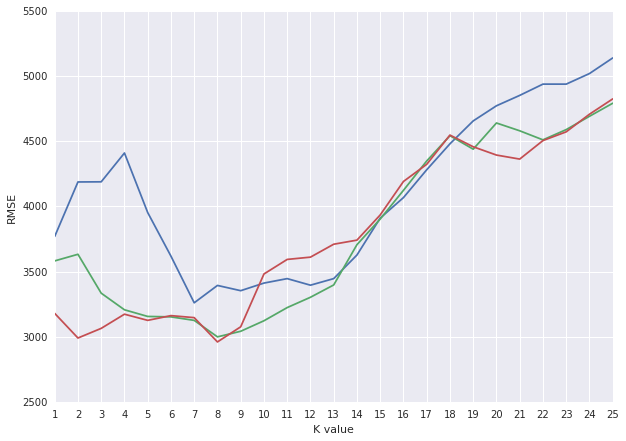

In [34]:
figure(figsize=(10,7))

for k, v in op_rmse_results.items():
    # As my schoolmates stated, using a dictionary would affect the order of the K and mess 
    # my plot. Better to use the order wanted and a list comprehension.
    x = neigh
    y = [v[i] for i in x]
    
    plt.plot(x,y)
    plt.xlabel('K value')
    plt.xticks(neigh)
    plt.ylabel('RMSE')

For this case, the best K values are 8 and 9. With these values I can optimize the model.

## 6.- Next Steps.

* Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
* Modify the knn_train_test() function to perform the data cleaning as well.

To be continued...